In [1]:
import pandas as pd
import numpy as np

# 1. Carga fichero


In [2]:
df_original = pd.read_csv("../Data\Raw\ds_salaries.csv")

In [3]:
df_original.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
import seaborn as sns

In [5]:
df_original["work_year"].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

In [6]:
df_original["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [7]:
df_original["employee_residence"].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [8]:
df_original.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
df_original[df_original["employee_residence"] != df_original["company_location"]]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
81,2023,SE,FT,Machine Learning Engineer,150000,USD,150000,PT,100,US,M
82,2023,MI,FT,Applied Machine Learning Engineer,65000,EUR,69751,IN,100,DE,S
183,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
218,2023,SE,FT,Applied Data Scientist,100000,AUD,68318,AU,100,FI,M
249,2022,SE,FT,Data Scientist,84000,EUR,88256,ES,100,GB,L
...,...,...,...,...,...,...,...,...,...,...,...
3729,2021,EN,FT,AI Scientist,1335000,INR,18053,IN,100,AS,S
3731,2020,MI,FT,Data Scientist,55000,EUR,62726,FR,50,LU,S
3735,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M


In [10]:
#creacion columna trabajadores residentes o no de pais procedencia empresa

df_original['mismatch'] = np.where(df_original['employee_residence'] != df_original['company_location'], 1, 0)

<AxesSubplot:>

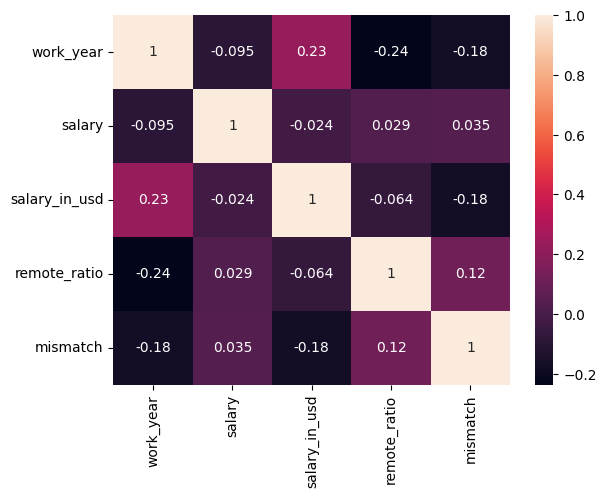

In [11]:
sns.heatmap(df_original.corr(), annot = True)

In [81]:
#El hecho de si el pais de residencia y el de precedencia de la compañia son el mismo no tiene correlacion con el salario, decidimos eliminar la variable




## Cambio usd a eur

In [12]:
tasa_cambio = 0.92

df_original["salario_eur"] = df_original["salary_in_usd"] * tasa_cambio

In [13]:
df_original.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'mismatch',
       'salario_eur'],
      dtype='object')

In [16]:
#sustituimos variables categoricas por el salario medio de cada tipo.

mean_encoding_experience_level = df_original.groupby('experience_level')['salario_eur'].mean()
df_original["experience_level_mean"] = df_original['experience_level'].map(mean_encoding_experience_level)

mean_encoding_employment_type = df_original.groupby('employment_type')['salario_eur'].mean()
df_original["employment_type_mean"] = df_original['employment_type'].map(mean_encoding_employment_type)

mean_encoding_job_title = df_original.groupby('job_title')['salario_eur'].mean()
df_original["job_title_mean"] = df_original['job_title'].map(mean_encoding_job_title)

mean_encoding_company_location = df_original.groupby('company_location')['salario_eur'].mean()
df_original["company_location_mean"] = df_original['company_location'].map(mean_encoding_company_location)

mean_encoding_employee_location = df_original.groupby('employee_residence')['salario_eur'].mean()
df_original["employee_location_mean"] = df_original['employee_residence'].map(mean_encoding_employee_location)

mean_encoding_company_size = df_original.groupby('company_size')['salario_eur'].mean()
df_original["company_size_mean"] = df_original['company_size'].map(mean_encoding_company_size)

mean_encoding_remote_ratio = df_original.groupby('employment_type')['salario_eur'].mean()
df_original["remote_ratio_mean"] = df_original['employment_type'].map(mean_encoding_remote_ratio)

In [17]:
import matplotlib.pyplot as plt

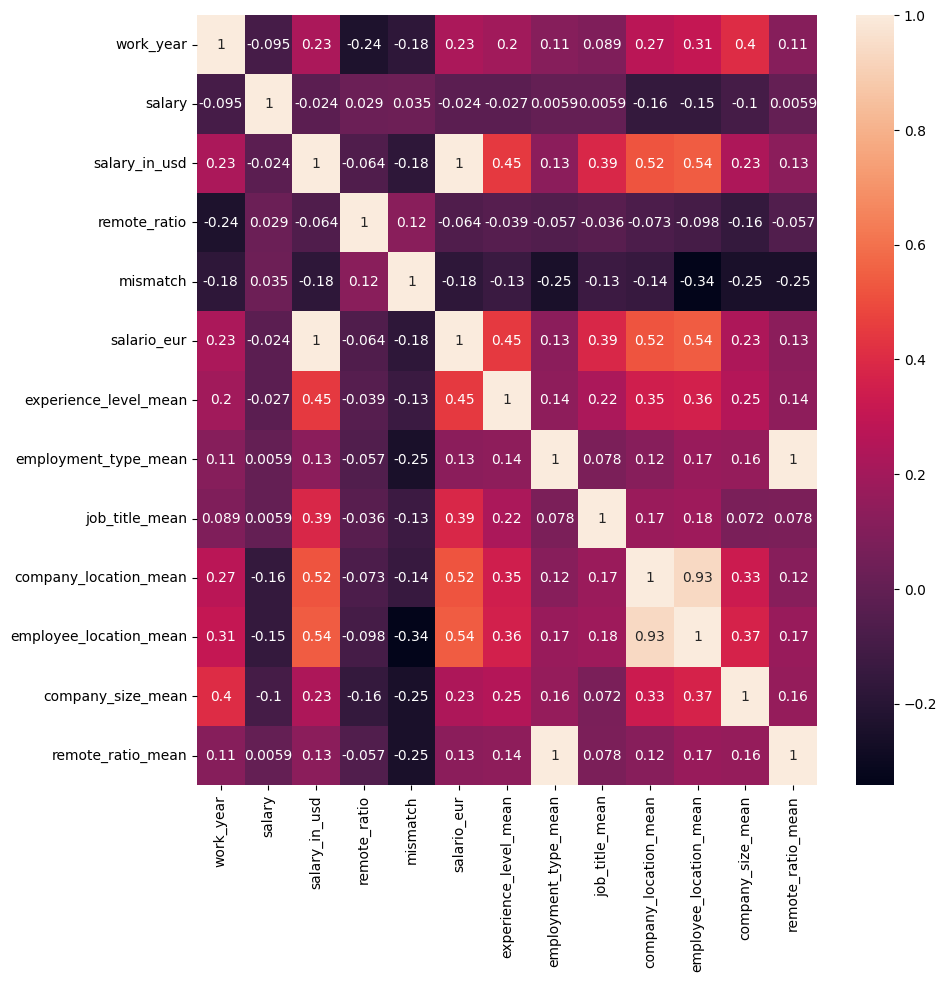

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(df_original.corr(), annot=True);

## Con el nuevo enfoque a las variables hemos mejorado la correlatividad de job title, company and employee location.

In [23]:
df_original.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'mismatch',
       'salario_eur', 'experience_level_mean', 'employment_type_mean',
       'job_title_mean', 'company_location_mean', 'employee_location_mean',
       'company_size_mean', 'remote_ratio_mean'],
      dtype='object')

In [22]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   work_year               3755 non-null   int64  
 1   experience_level        3755 non-null   object 
 2   employment_type         3755 non-null   object 
 3   job_title               3755 non-null   object 
 4   salary                  3755 non-null   int64  
 5   salary_currency         3755 non-null   object 
 6   salary_in_usd           3755 non-null   int64  
 7   employee_residence      3755 non-null   object 
 8   remote_ratio            3755 non-null   int64  
 9   company_location        3755 non-null   object 
 10  company_size            3755 non-null   object 
 11  mismatch                3755 non-null   int32  
 12  salario_eur             3755 non-null   float64
 13  experience_level_mean   3755 non-null   float64
 14  employment_type_mean    3755 non-null   

In [26]:
#Eliminar variables redundantes.
df_processed = df_original[['work_year','salario_eur', 'experience_level_mean', 'employment_type_mean',
       'job_title_mean', 'company_location_mean', 'employee_location_mean',
       'company_size_mean', 'remote_ratio_mean']]

In [27]:
df_processed.head()

,work_year,salario_eur,experience_level_mean,employment_type_mean,job_title_mean,company_location_mean,employee_location_mean,company_size_mean,remote_ratio_mean
0,2023,78979.24,140806.985819,127249.063604,182317.435000,53061.979740,55626.282000,108836.903789,127249.063604
1,2023,27600.00,96163.864000,104371.148000,145684.245882,139676.248776,140596.250719,71968.547838,104371.148000
2,2023,23460.00,96163.864000,104371.148000,145684.245882,139676.248776,140596.250719,71968.547838,104371.148000
3,2023,161000.00,140806.985819,127249.063604,129600.184238,121364.274483,121645.073412,131680.104497,127249.063604
4,2023,110400.00,140806.985819,127249.063604,129600.184238,121364.274483,121645.073412,131680.104497,127249.063604


In [28]:
df_original.describe()

,work_year,salary,salary_in_usd,remote_ratio,mismatch,salario_eur,experience_level_mean,employment_type_mean,job_title_mean,company_location_mean,employee_location_mean,company_size_mean,remote_ratio_mean
count,3755.000000,3.755000e+03,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638,0.025566,126564.758690,126564.758690,126564.758690,126564.758690,126564.758690,126564.758690,126564.758690,126564.758690
std,0.691448,6.716765e+05,63055.625278,48.589050,0.157857,58011.175256,25885.522204,7429.561105,22427.718301,30135.667375,31253.471707,13322.921906,7429.561105
min,2020.000000,6.000000e+03,5132.000000,0.000000,0.000000,4721.440000,72262.581625,36371.009412,4976.280000,5799.680000,5799.680000,71968.547838,36371.009412
25%,2022.000000,1.000000e+05,95000.000000,0.000000,0.000000,87400.000000,96163.864000,127249.063604,125732.803636,139676.248776,140596.250719,131680.104497,127249.063604
50%,2022.000000,1.380000e+05,135000.000000,0.000000,0.000000,124200.000000,140806.985819,127249.063604,131362.875846,139676.248776,140596.250719,131680.104497,127249.063604
75%,2023.000000,1.800000e+05,175000.000000,100.000000,0.000000,161000.000000,140806.985819,127249.063604,131362.875846,139676.248776,140596.250719,131680.104497,127249.063604
max,2023.000000,3.040000e+07,450000.000000,100.000000,1.000000,414000.000000,179336.455439,127249.063604,345000.000000,249730.780000,389927.280000,131680.104497,127249.063604


## 2. Creación csv train y test


In [51]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_original, test_size=0.2, random_state=42)

In [52]:
print(test_df.shape)
print(train_df.shape)


(751, 9)
(3004, 9)


## 3.Creación csv

In [53]:
def csv(nombre_archivo, archivo_guardar):

    ruta_archivo = '../Data/' + nombre_archivo + '.csv'
    archivo_guardar.to_csv(ruta_archivo, index=False)

In [ ]:
csv("processed", df_original)

In [54]:
csv("test", test_df)

In [55]:
csv("train", train_df)